# Building the model (multikernal SVM)

In [24]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

import nbimporter
import performance_measure

In [25]:
def train_svm_model_balanced(X_train,y_train, X_test): 
    
    svm = SVC(kernel='poly', gamma='auto', random_state=12,class_weight='balanced')#, probability=True)

    # Fitting the model
    svm.fit(X_train, y_train)

    # Predicting values
    y_train_pred = svm.predict(X_train)
    y_test_pred = svm.predict(X_test)
    
    
    #y_train_pred = svm.predict_proba(X_train)
    #y_test_pred = svm.predict_proba(X_test)
    
    #y_train_pred = np.argmax(y_train_pred, axis=1)
    #y_test_pred = np.argmax(y_test_pred, axis=1)

    return svm, y_train_pred, y_test_pred

In [26]:
def train_svm_model_balanced_with_prob(X_train,y_train, X_test): 
    
    svm = SVC(kernel='poly', gamma='auto', random_state=12, probability=True, class_weight='balanced')

    # Fitting the model
    svm.fit(X_train, y_train)

    # Predicting values
    #y_train_pred = svm.predict(X_train)
    #y_test_pred = svm.predict(X_test)
    
    
    y_train_pred = svm.predict_proba(X_train)
    y_test_pred = svm.predict_proba(X_test)
    
    y_train_pred = np.argmax(y_train_pred, axis=1)
    y_test_pred = np.argmax(y_test_pred, axis=1)

    return svm, y_train_pred, y_test_pred

In [27]:
def train_svm_mode(X_train,y_train, X_test):
    
    svm = SVC(kernel='poly', gamma='auto', random_state=12, probability=True)

    # Fitting the model
    svm.fit(X_train, y_train)

    # Predicting values
    y_train_pred = svm.predict_proba(X_train)
    y_test_pred = svm.predict_proba(X_test)
    
    y_train_pred = np.argmax(y_train_pred, axis=1)
    y_test_pred = np.argmax(y_test_pred, axis=1)

    return svm, y_train_pred, y_test_pred

In [28]:
def get_svm_model_balanced(X_train, X_test, y_train, y_test):
    print('Loading...')
    print('Training...')
    svm, y_train_pred, y_test_pred = train_svm_model_balanced(X_train,y_train, X_test)
    print('Training Complete')
    print('Plotting Confusion Matrix...')
    performance_measure.plot_confusion_matrix(y_test,y_test_pred, normalize=True)
    print('Plotting Performance Measure...')
    performance_measure.get_performance_measures(y_test, y_test_pred)
    return svm
    

In [29]:
def get_svm_model_balanced1(X_train, X_test, y_train, y_test):
    print('Loading...')
    print('Training...')
    svm, y_train_pred, y_test_pred = train_svm_model_balanced1(X_train,y_train, X_test)
    print('Training Complete')
    print('Plotting Confusion Matrix...')
    performance_measure.plot_confusion_matrix(y_test,y_test_pred, normalize=True)
    print('Plotting Performance Measure...')
    performance_measure.get_performance_measures(y_test, y_test_pred)
    return svm
    

In [30]:
def get_svm_model(X_train, X_test, y_train, y_test):
    print('Loading...')
    print('Training...')
    svm, y_train_pred, y_test_pred = train_svm_model(X_train,y_train, X_test)
    print('Training Complete')
    print('Plotting Confusion Matrix...')
    performance_measure.plot_confusion_matrix(y_test,y_test_pred, normalize=True)
    print('Plotting Performance Measure...')
    performance_measure.get_performance_measures(y_test, y_test_pred)
    return svm

### Testing with toy dataset from sklearn

Loading...
Training...
Training Complete
Plotting Confusion Matrix...
Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         0.95652174 0.04347826]
 [0.0625     0.         0.9375    ]]


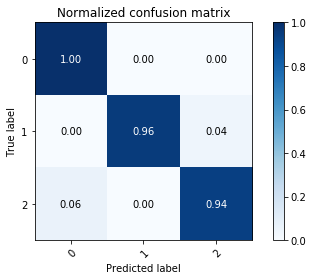

Plotting Performance Measure...
Total Accuracy 		0.966

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
0                         	 0.952 		 1.000 		 0.976
1                         	 1.000 		 0.957 		 0.978
2                         	 0.938 		 0.938 		 0.938


In [31]:
from sklearn.datasets import load_wine
data = load_wine()


X = pd.DataFrame(data.data, columns = data.feature_names)
y = pd.DataFrame(data.target)
y = np.array(y)
y = np.ravel(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

svm = get_svm_model(X_train, X_test, y_train, y_test)

Loading...
Training...
Training Complete
Plotting Confusion Matrix...
Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         0.95652174 0.04347826]
 [0.125      0.         0.875     ]]


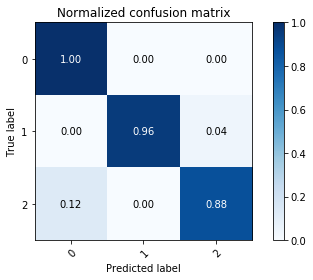

Plotting Performance Measure...
Total Accuracy 		0.949

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
0                         	 0.909 		 1.000 		 0.952
1                         	 1.000 		 0.957 		 0.978
2                         	 0.933 		 0.875 		 0.903


In [32]:
svm = get_svm_model_balanced2(X_train, X_test, y_train, y_test)

Loading...
Training...
Training Complete
Plotting Confusion Matrix...
Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         0.95652174 0.04347826]
 [0.0625     0.         0.9375    ]]


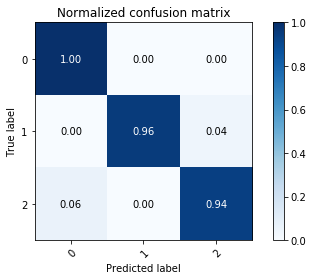

Plotting Performance Measure...
Total Accuracy 		0.966

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
0                         	 0.952 		 1.000 		 0.976
1                         	 1.000 		 0.957 		 0.978
2                         	 0.938 		 0.938 		 0.938


SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=True, random_state=12, shrinking=True,
  tol=0.001, verbose=False)

In [33]:
get_svm_model_balanced1(X_train, X_test, y_train, y_test)